In [2]:
from sklearn.svm import SVC 
import pandas as pd 
import numpy as np 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pickle
import os


In [3]:
# Directorio base
base_dir = os.path.join('..','data', 'train_test_val')

# Cargar los DataFrames
train_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test.csv'))
val_df = pd.read_csv(os.path.join(base_dir, 'val.csv'))

# Declaracion de la variable objetivo
target = 'income'
continous_columns = ['age', 'fnlwgt', 'educational-num', 'capital_gain', 'capital_loss', 'hours-per-week']

In [4]:
train_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'hours-per-week',
       'income', 'capital_gain', 'capital_loss', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relat

In [5]:
#==========================================================================================================================
    # Cargo un 20% de mi dataset de prueba ya que no tengo la capacidad para entrenar un modelo en local
    # Esto es solo de prueba para verificar que el codigo esta bien y se puede comentar/borrar al final.
train_df, _ = train_test_split(train_df, 
                            train_size=0.2, 
                            stratify=train_df['income'], 
                            random_state=42)
#========================================================================================================================== 

In [6]:
#Separacion de caracteristicas y variable objetivo
x_train, y_train = train_df.drop(columns=target), train_df[target]
x_test, y_test = test_df.drop(columns=target), test_df[target]
x_val, y_val = val_df.drop(columns=target), val_df[target]


In [7]:
#Escalado de mis variables continuas
scaler = StandardScaler()

x_train_continuous = x_train[continous_columns]
x_test_continuous = x_test[continous_columns]
x_val_continuous = x_val[continous_columns]

x_train[continous_columns] = scaler.fit_transform(x_train_continuous)
x_test[continous_columns] = scaler.transform(x_test_continuous)
x_val[continous_columns] = scaler.transform(x_val_continuous)

BASELINE

In [15]:

baseline = SVC(random_state=42,probability=True)
baseline.fit(x_train, y_train)


svc_preds_test = baseline.predict(x_test)
svc_proba_test = baseline.predict_proba(x_test)[:, 1]

svc_preds_val = baseline.predict(x_val)
svc_proba_val = baseline.predict_proba(x_val)[:, 1]

print("--Testing--")
print("F1 Score:", f1_score(y_test, svc_preds_test))
print("AUC Score:", roc_auc_score(y_test, svc_proba_test))

cm_base_test = confusion_matrix(y_val, svc_preds_val)
print(cm_base_test)

print("--Validation--")
print("F1 Score:", f1_score(y_test, svc_preds_val))
print("AUC Score:", roc_auc_score(y_test, svc_proba_val))

cm_base_val = confusion_matrix(y_val, svc_preds_val)
print(cm_base_val)

with open(r'../artifacts/svc_baseline.pkl', 'wb') as files:
    pickle.dump(baseline, files)

--Testing--
F1 Score: 0.6376524892845368
AUC Score: 0.8918809749532828
[[5024  370]
 [ 732  974]]
--Validation--
F1 Score: 0.20327868852459016
AUC Score: 0.49971474101091873
[[5024  370]
 [ 732  974]]


In [9]:
#Instanciación y utlizacion de la tecnica Rando Undersampling por las mismas razones que use el 20% dataset. 
rus = RandomUnderSampler(random_state=42)
column_names = x_train.columns.tolist()
x_train_smt, y_train_smt = rus.fit_resample(x_train, y_train)
#x_train_smt, y_train_smt = x_train,y_train
print(y_train_smt.value_counts())

income
0    1592
1    1592
Name: count, dtype: int64


In [10]:
clf = SVC(probability=True, random_state=42)

In [11]:
param_grid = [
{'kernel': ['linear'], 'class_weight': ['balanced']},
{'kernel': ['poly'],'gamma': [0.001, 0.0001], 'class_weight': ['balanced']},
{'kernel': ['sigmoid'],'gamma': [0.001, 0.0001], 'class_weight': ['balanced']},
{'kernel': ['rbf'],'gamma': [0.001, 0.0001], 'class_weight': ['balanced']}
# HIPERPARAMETROS PARA PROBAR CON DIFERENTES PESOS: PROBAR SI NO SE USA SMOTE O RUS O LAS VARIABLES NO SE BALANCEAN
# {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
# {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']},
# {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
# {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(clf, param_grid, cv=cv, scoring='f1', verbose=5, n_jobs=-1)



Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid=[{'class_weight': ['balanced'], 'kernel': ['linear']},
                         {'class_weight': ['balanced'],
                          'gamma': [0.001, 0.0001], 'kernel': ['poly']},
                         {'class_weight': ['balanced'],
                          'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']},
                         {'class_weight': ['balanced'],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='f1', verbose=5)

In [19]:
# Entrenamiento del Modelo  
try:
    grid = pickle.load(open('../artifacts/svc.pkl', 'rb'))
except:
    print('ERROR NO SE ENCUENTRA EL ARCHIVO PKL, ENTRENAMOS EL MODELO')
    grid.fit(x_train_smt, y_train_smt) 

## PICKLE

### Guardar Modelo

In [1]:

with open(r'../artifacts/svc.pkl', 'wb') as files:
    pickle.dump(grid, files)

NameError: name 'pickle' is not defined

In [ ]:
grid_predictions = grid.predict(x_test) 

best_params = grid.best_params_
best_estimator = grid.best_estimator_

In [ ]:
train_preds =  grid.predict(x_train)
train_accuracy = accuracy_score(y_train, train_preds)
train_report = classification_report(y_train, train_preds)
train_cm = confusion_matrix(y_train, train_preds)
train_auc = roc_auc_score(y_train, train_preds)


In [ ]:
test_preds = grid.predict(x_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)
test_auc = roc_auc_score(y_test, test_preds)


In [ ]:

val_preds = grid.predict(x_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_report = classification_report(y_val, val_preds)
val_cm = confusion_matrix(y_val, val_preds)
val_auc = roc_auc_score(y_val, val_preds)


In [ ]:

train_f1 = f1_score(y_train, train_preds, pos_label=1, zero_division=0)
val_f1 = f1_score(y_val, val_preds, pos_label=1, zero_division=0)
test_f1 = f1_score(y_test, test_preds, pos_label=1, zero_division=0)


In [ ]:
print("=== Target Value Counts ===")
print(y_train_smt.value_counts())
print()

print("=== Best Parameters ===")
print(best_params)
print()

print("=== Best Estimator ===")
print(best_estimator)
print()

=== Target Value Counts ===
income
0    1592
1    1592
Name: count, dtype: int64

=== Best Parameters ===
{'class_weight': 'balanced', 'kernel': 'linear'}

=== Best Estimator ===
SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)



In [ ]:


# TRAINING RESULTS
print("=== Dataset de Training ===")
print(f"AUC Score: {train_auc:.4f}")
print(f"Accuracy Score: {train_accuracy:.4f}")
print("Classification Report:")
print(train_report)
print("Confusion Matrix:")
print(train_cm)
print()





=== Dataset de Training ===
AUC Score: 0.8213
Accuracy Score: 0.7934
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      5034
           1       0.54      0.88      0.67      1592

    accuracy                           0.79      6626
   macro avg       0.75      0.82      0.76      6626
weighted avg       0.85      0.79      0.81      6626

Confusion Matrix:
[[3864 1170]
 [ 199 1393]]



: 

In [ ]:
# TESTING RESULTS
print("=== Dataset de Testing ===")
print(f"AUC Score: {test_auc:.4f}")
print(f"Accuracy Score: {test_accuracy:.4f}")
print("Classification Report:")
print(test_report)
print("Confusion Matrix:")
print(test_cm)
print()


=== Dataset de Testing ===
AUC Score: 0.8085
Accuracy Score: 0.7797
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      5394
           1       0.53      0.86      0.65      1706

    accuracy                           0.78      7100
   macro avg       0.74      0.81      0.75      7100
weighted avg       0.84      0.78      0.79      7100

Confusion Matrix:
[[4062 1332]
 [ 232 1474]]



In [ ]:
# VALIDATION RESULTS
print("=== Dataset de Validación ===")
print(f"AUC Score: {val_auc:.4f}")
print(f"Accuracy Score: {val_accuracy:.4f}")
print("Classification Report:")
print(val_report)
print("Confusion Matrix:")
print(val_cm)
print()

# F1-SCORES
print("=== F1-Scores para la clase 1 ===")
print(f"Train F1-score: {train_f1:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

=== Dataset de Validación ===
AUC Score: 0.8220
Accuracy Score: 0.7932
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      5394
           1       0.54      0.88      0.67      1706

    accuracy                           0.79      7100
   macro avg       0.75      0.82      0.76      7100
weighted avg       0.85      0.79      0.81      7100

Confusion Matrix:
[[4135 1259]
 [ 209 1497]]

=== F1-Scores para la clase 1 ===
Train F1-score: 0.6705
Validation F1-score: 0.6710
Test F1-score: 0.6534


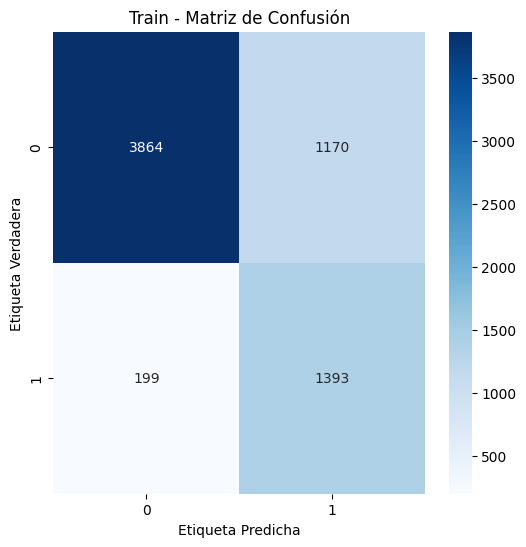

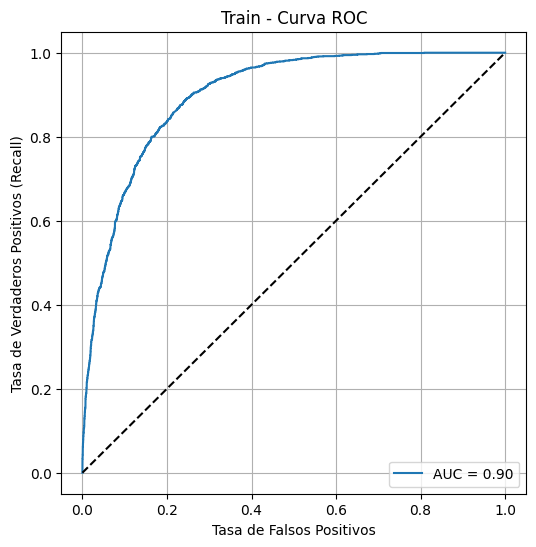

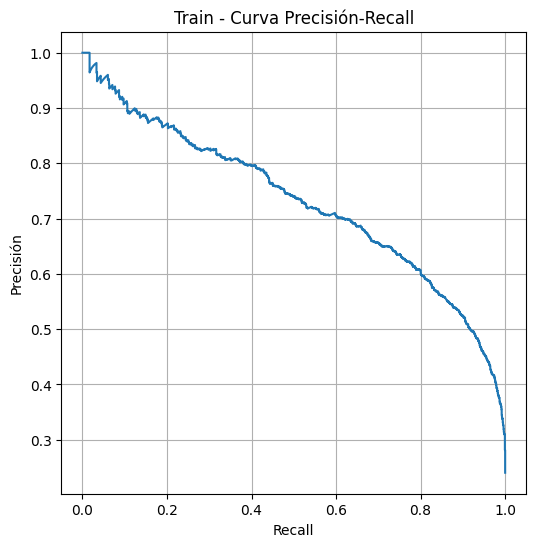

c:\Users\Juan\Documents\VSPYTHON\Proyecto_Prediccion\income\src\utils.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, orient='h', palette='viridis')


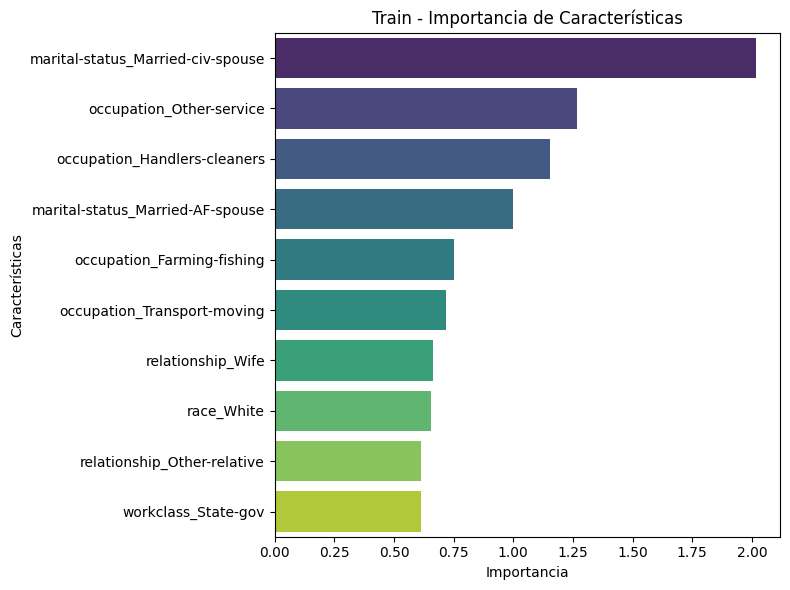

In [ ]:
from utils import *

# === Gráficos para Training ===
plot_all_metrics(
    y_true=y_train,
    y_pred=train_preds,
    model=grid.best_estimator_,
    feature_names=column_names,
    x_features=x_train,
    dataset_name='Train'
)




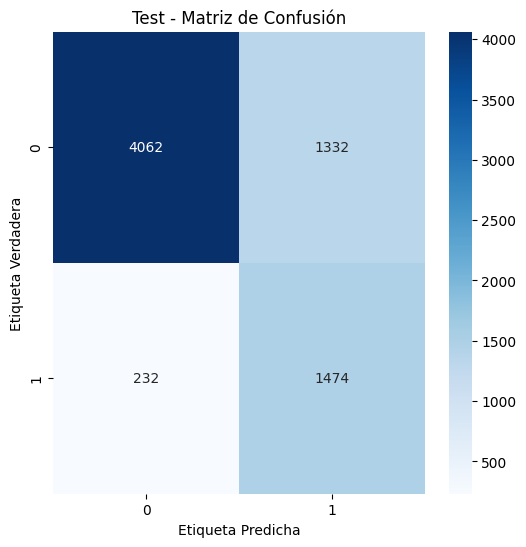

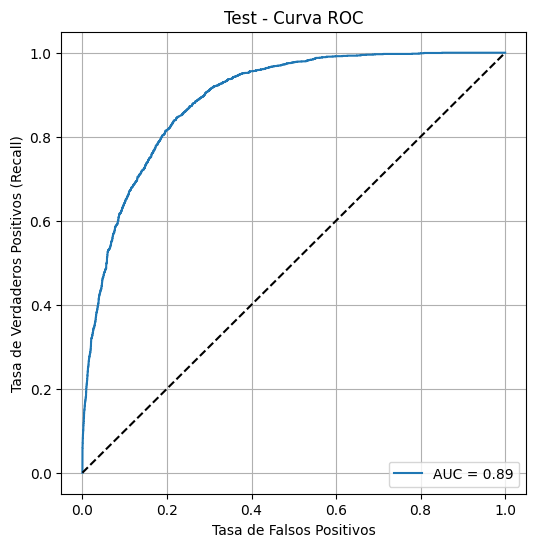

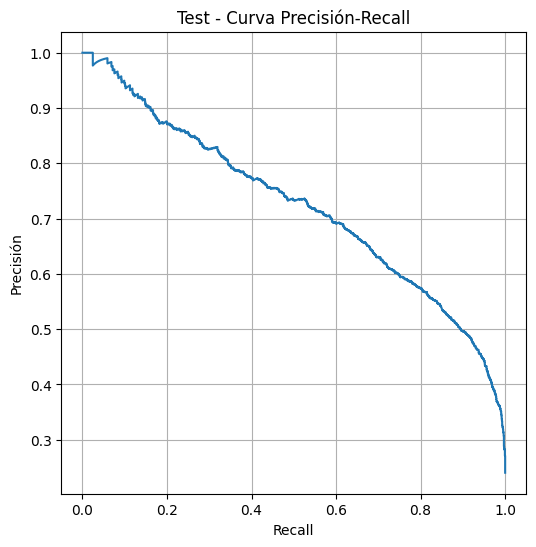

c:\Users\Juan\Documents\VSPYTHON\Proyecto_Prediccion\income\src\utils.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, orient='h', palette='viridis')


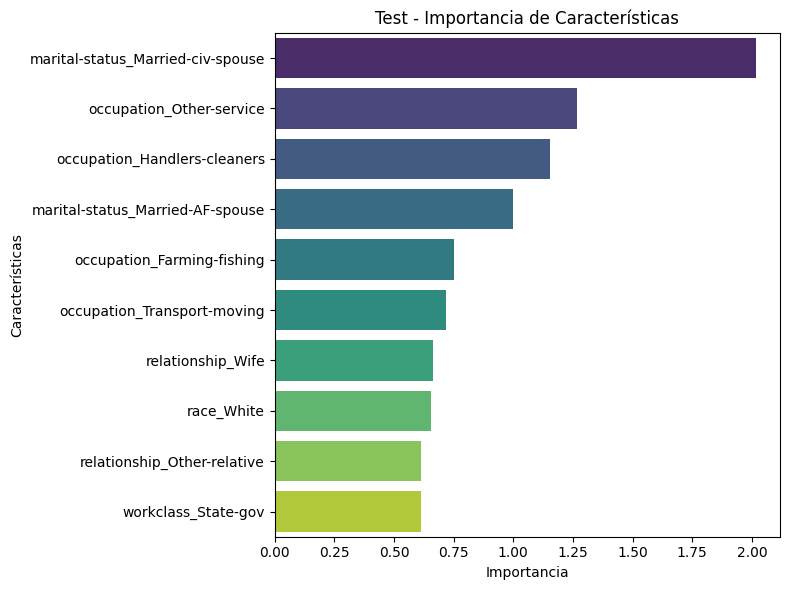

In [ ]:
# === Gráficos para Testing ===
plot_all_metrics(
    y_true=y_test,
    y_pred=test_preds,
    model=grid.best_estimator_,
    feature_names=column_names,
    x_features=x_test,
    dataset_name='Test'
)

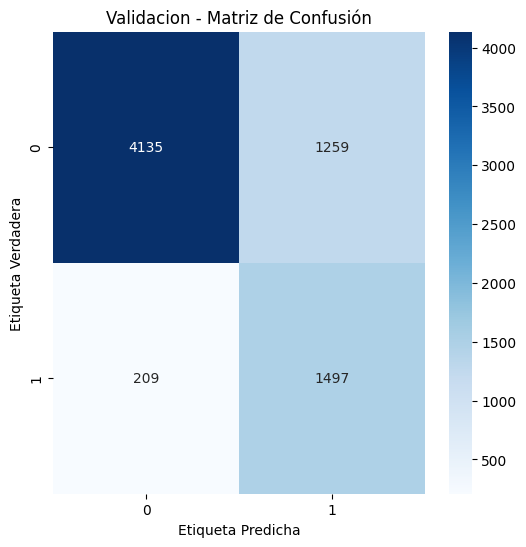

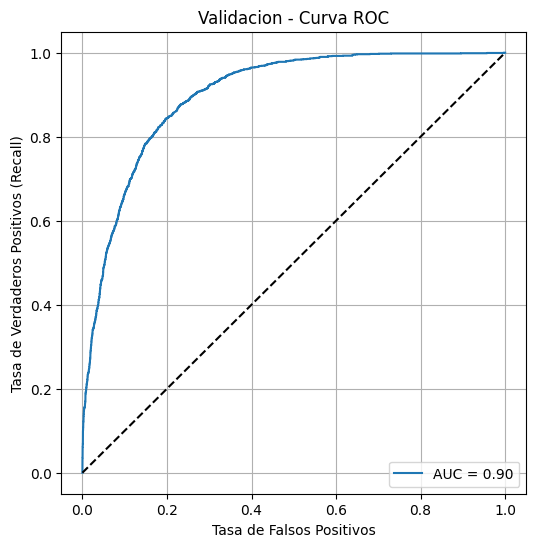

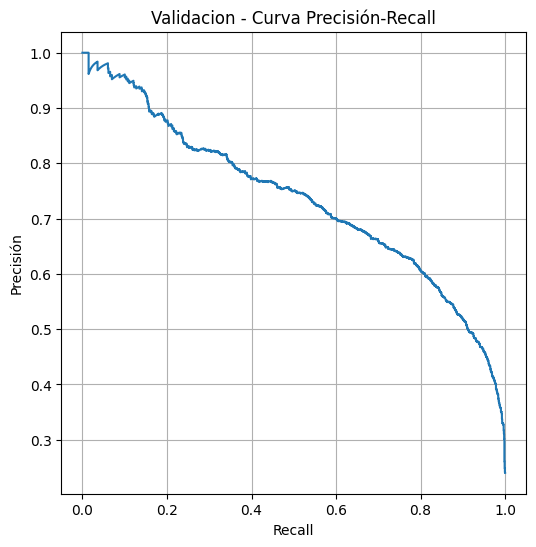

c:\Users\Juan\Documents\VSPYTHON\Proyecto_Prediccion\income\src\utils.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, orient='h', palette='viridis')


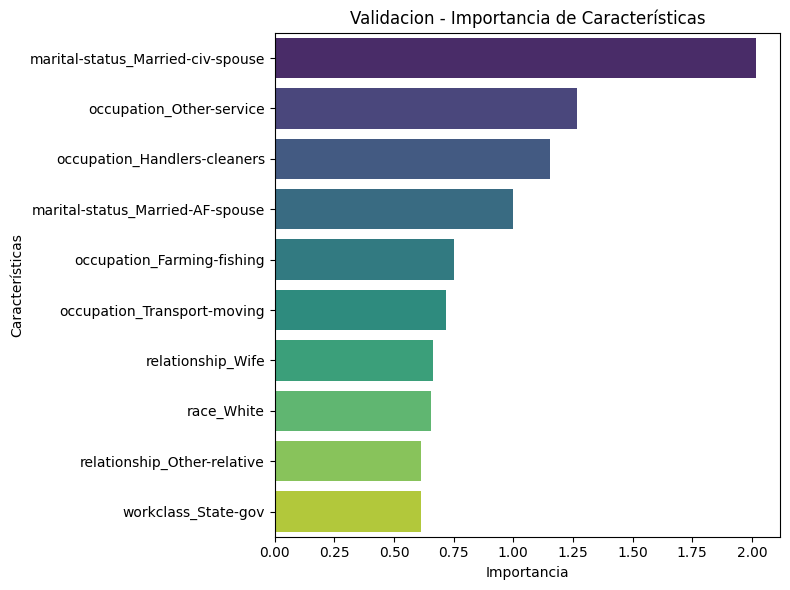

In [ ]:

# === Gráficos para Validación ===
plot_all_metrics(
    y_true=y_val,
    y_pred=val_preds,
    model=grid.best_estimator_,
    feature_names=column_names,
    x_features=x_val,
    dataset_name='Validacion'
)

### **Conclusiones sobre el rendimiento del modelo SVC (con kernel lineal y Random Undersampling):**

* **F1-score estable para la clase `>50K`**:

  * El F1-score se mantuvo constante entre entrenamiento (0.67), validación (0.67) y prueba (0.65).
  * Esto indica que el modelo funciona de forma consistente, incluso usando solo el 20% del dataset para entrenar.

* **Buen AUC Score en todos los conjuntos**:

  * Los valores de AUC estuvieron entre 0.80 y 0.82, lo que muestra que el modelo distingue bien entre personas con ingresos altos y bajos.

* **Matriz de confusión muestra muchas predicciones positivas correctas, pero también errores**:

  * El modelo acierta en la mayoría de los casos cuando una persona gana más de 50K (alto *recall*).
  * Sin embargo, también clasifica erróneamente a muchas personas que ganan menos de 50K como si ganaran más (baja *precisión*).
  * Esto se refleja en un número alto de falsos positivos, por ejemplo en validación: 1,259 errores de este tipo.

* **Conclusión general**:

  * Para haber usado pocos datos y recursos limitados, el modelo ofrece un rendimiento decente.
  * Sacrifica algo de precisión para asegurar que no se le escape casi nadie con ingresos altos.
